In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn import metrics

In [27]:
df = pd.read_csv('Adult_income_dataset.csv')
df.head()

,age,workclass,Final_Weight_of_Income,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Data Information

In [28]:
df.shape

(32561, 15)

In [29]:
df.describe(include='all')

,age,workclass,Final_Weight_of_Income,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [30]:
df.infer_objects().dtypes

age                        int64
workclass                 object
Final_Weight_of_Income     int64
education                 object
education.num              int64
marital.status            object
occupation                object
relationship              object
race                      object
sex                       object
capital.gain               int64
capital.loss               int64
hours.per.week             int64
native.country            object
income                    object
dtype: object

In [31]:
df.duplicated().sum()

24

In [32]:
df.isna().sum()

age                       0
workclass                 0
Final_Weight_of_Income    0
education                 0
education.num             0
marital.status            0
occupation                0
relationship              0
race                      0
sex                       0
capital.gain              0
capital.loss              0
hours.per.week            0
native.country            0
income                    0
dtype: int64

## Data Pre-Processing

In [33]:
df = df.replace('?', np.nan).dropna()

In [34]:
df.drop_duplicates().shape

(30139, 15)

## Numerical Variable distributions

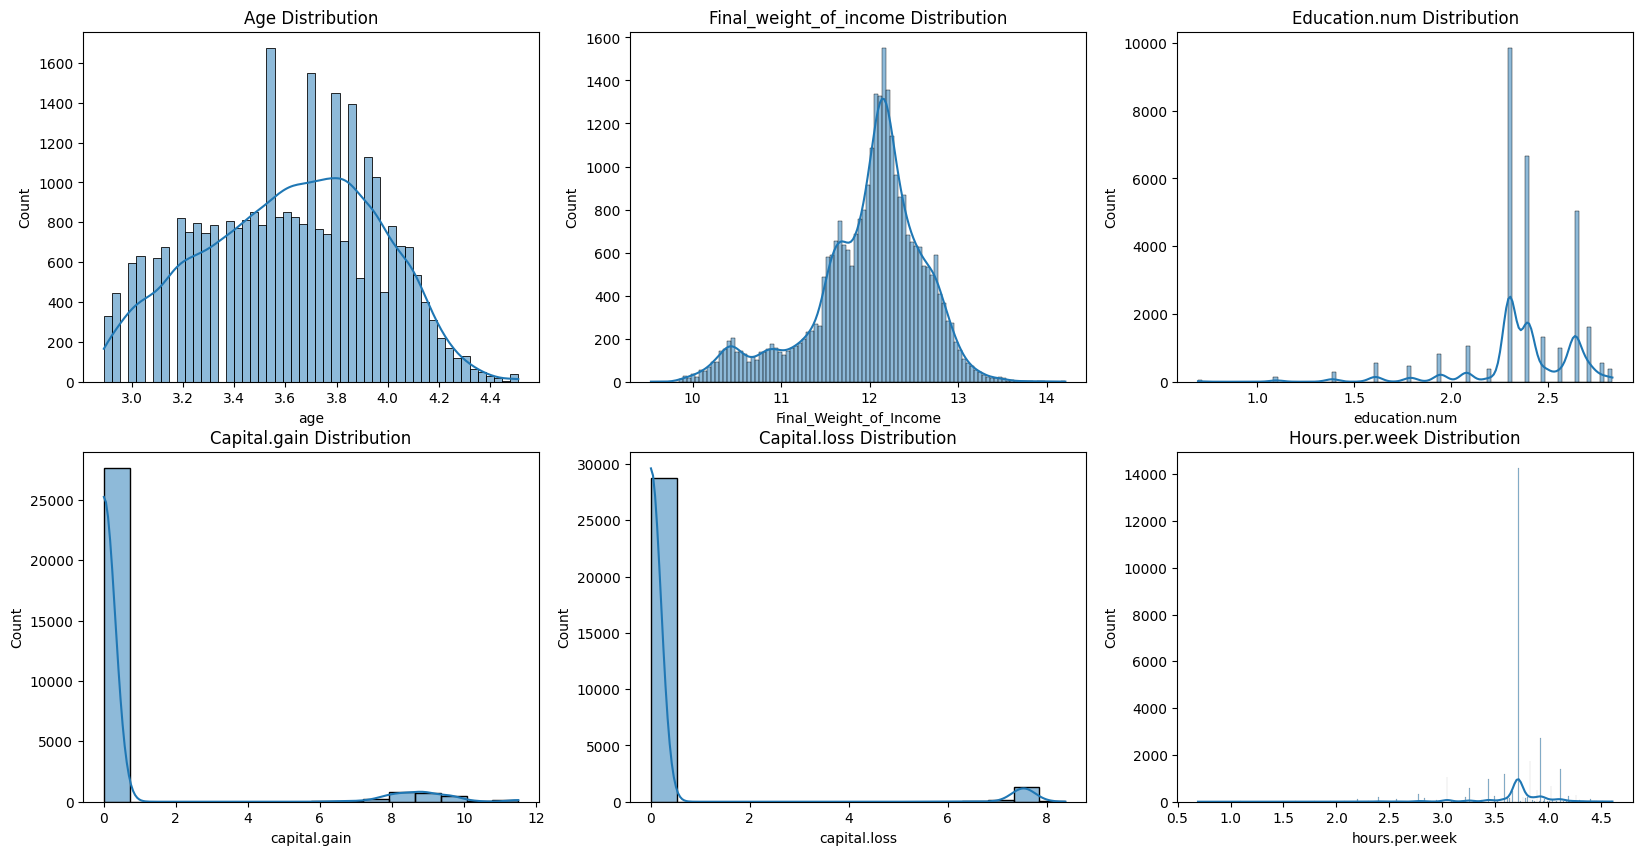

In [35]:
numeric_var = ['age','Final_Weight_of_Income','education.num','capital.gain','capital.loss','hours.per.week']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
for ax, col in zip(axs.flatten(), numeric_var):
    norm_df = np.log(df[col] + 1)
    sns.histplot(norm_df, kde=True, ax=ax)
    ax.set_title(f'{col.capitalize()} Distribution')
    ax.set_ylabel('Count')

## Distribution by Income

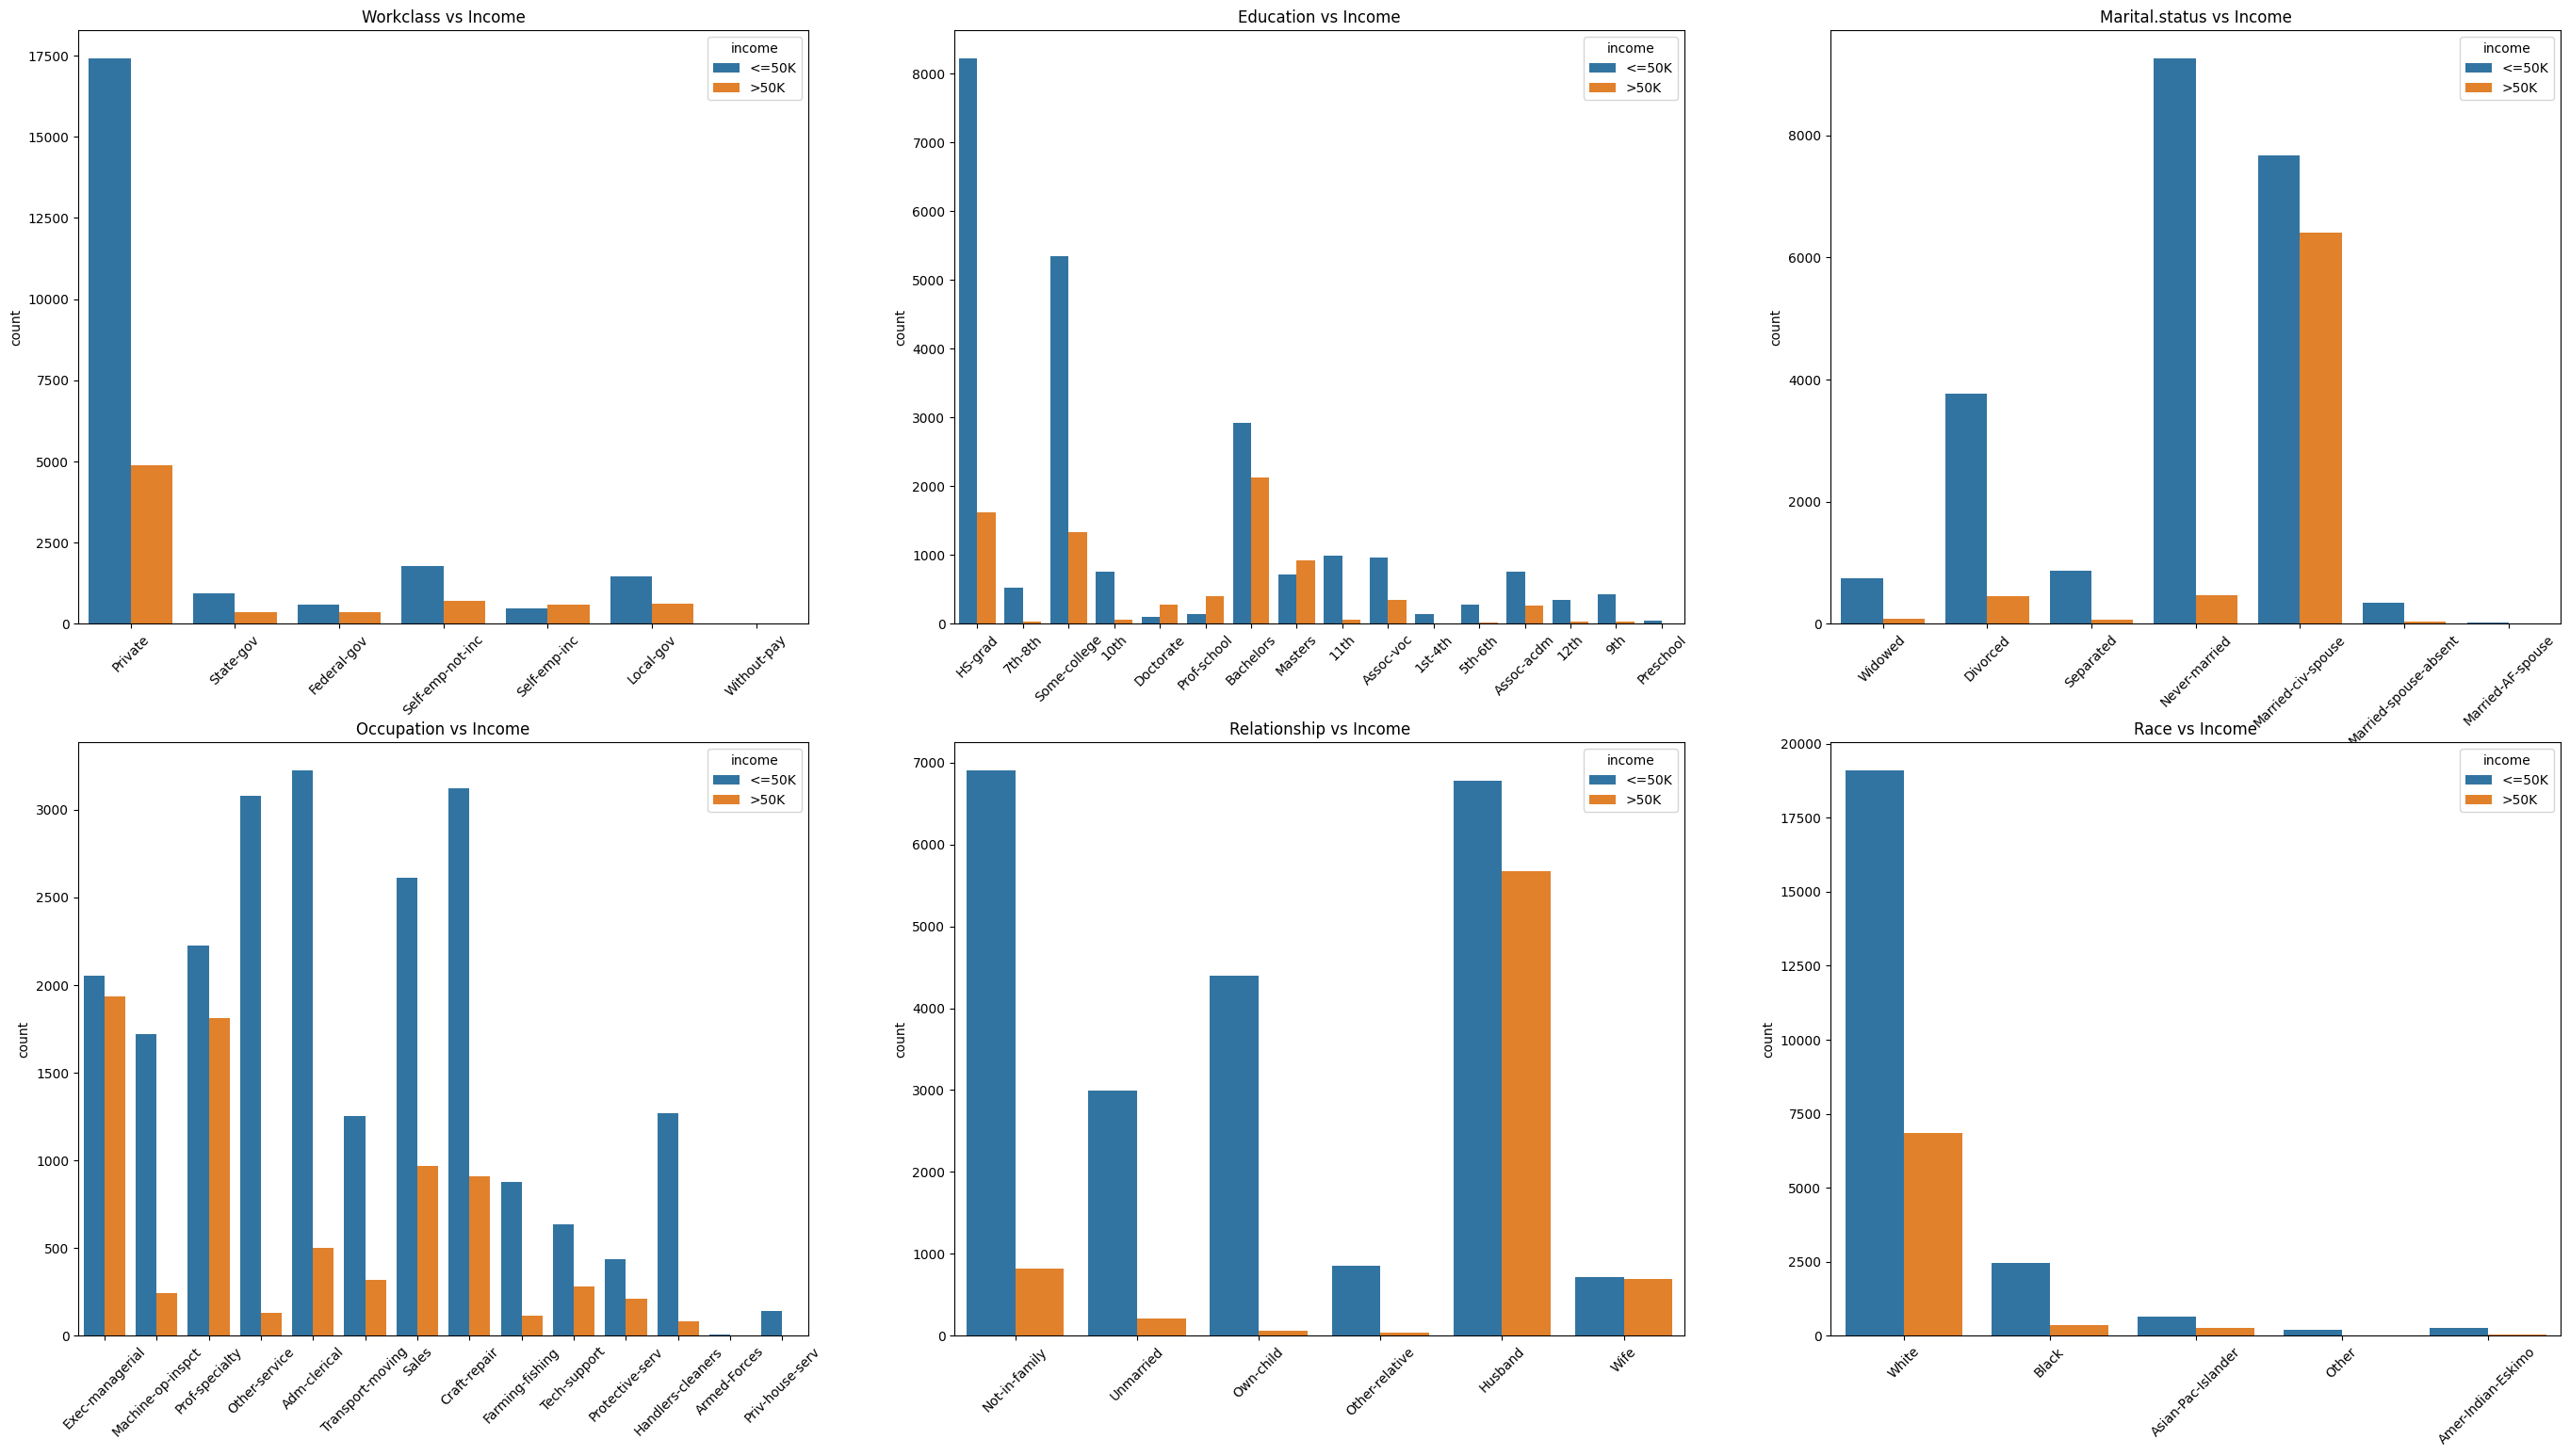

In [36]:
columns = df.drop(columns=numeric_var).columns
fig, axs = plt.subplots(2, 3, figsize=(34,18))
for ax, col in zip(axs.flatten(), columns):
    sns.countplot(x=col, data=df, hue='income', ax=ax)
    ax.set_title(f'{col.capitalize()} vs Income')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

## Distribution by Race

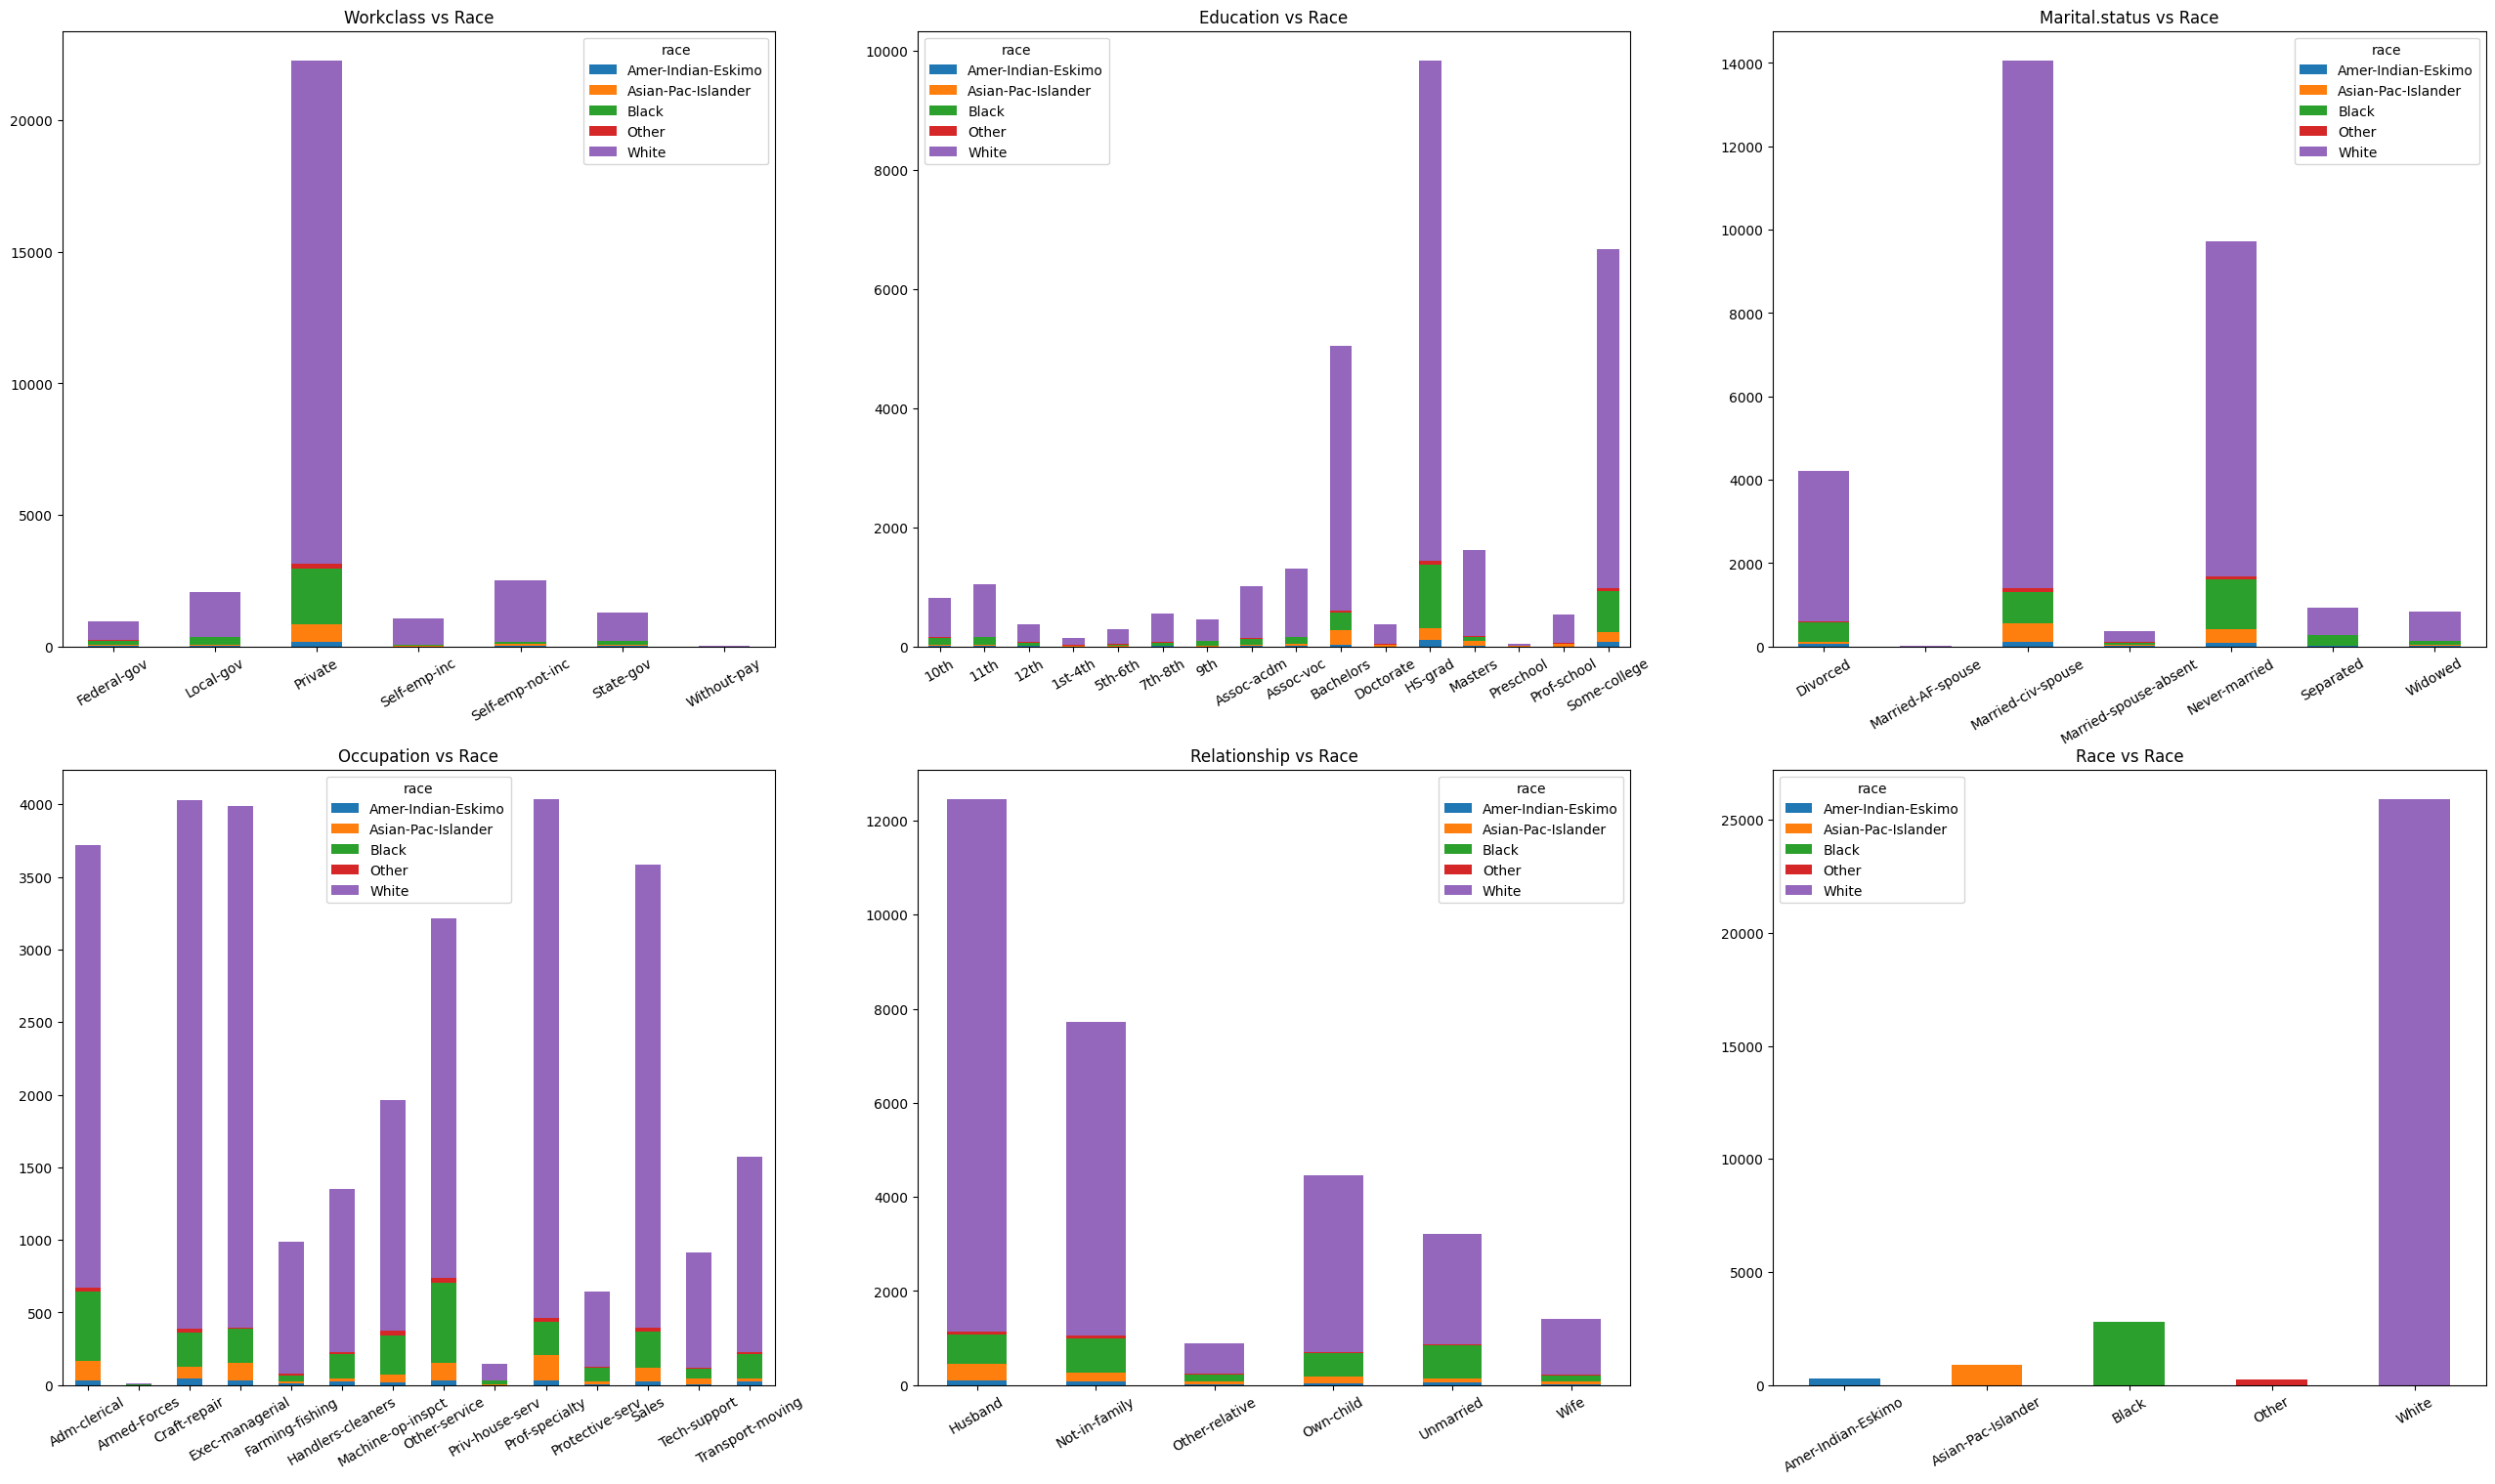

In [37]:
columns = df.drop(columns=numeric_var).columns
fig, axs = plt.subplots(2, 3, figsize=(32, 18))

for ax, col in zip(axs.flatten(), columns):
    crosstab = pd.crosstab(df[col], df['race'])
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{col.capitalize()} vs Race')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=30)

## Distribution by Gender

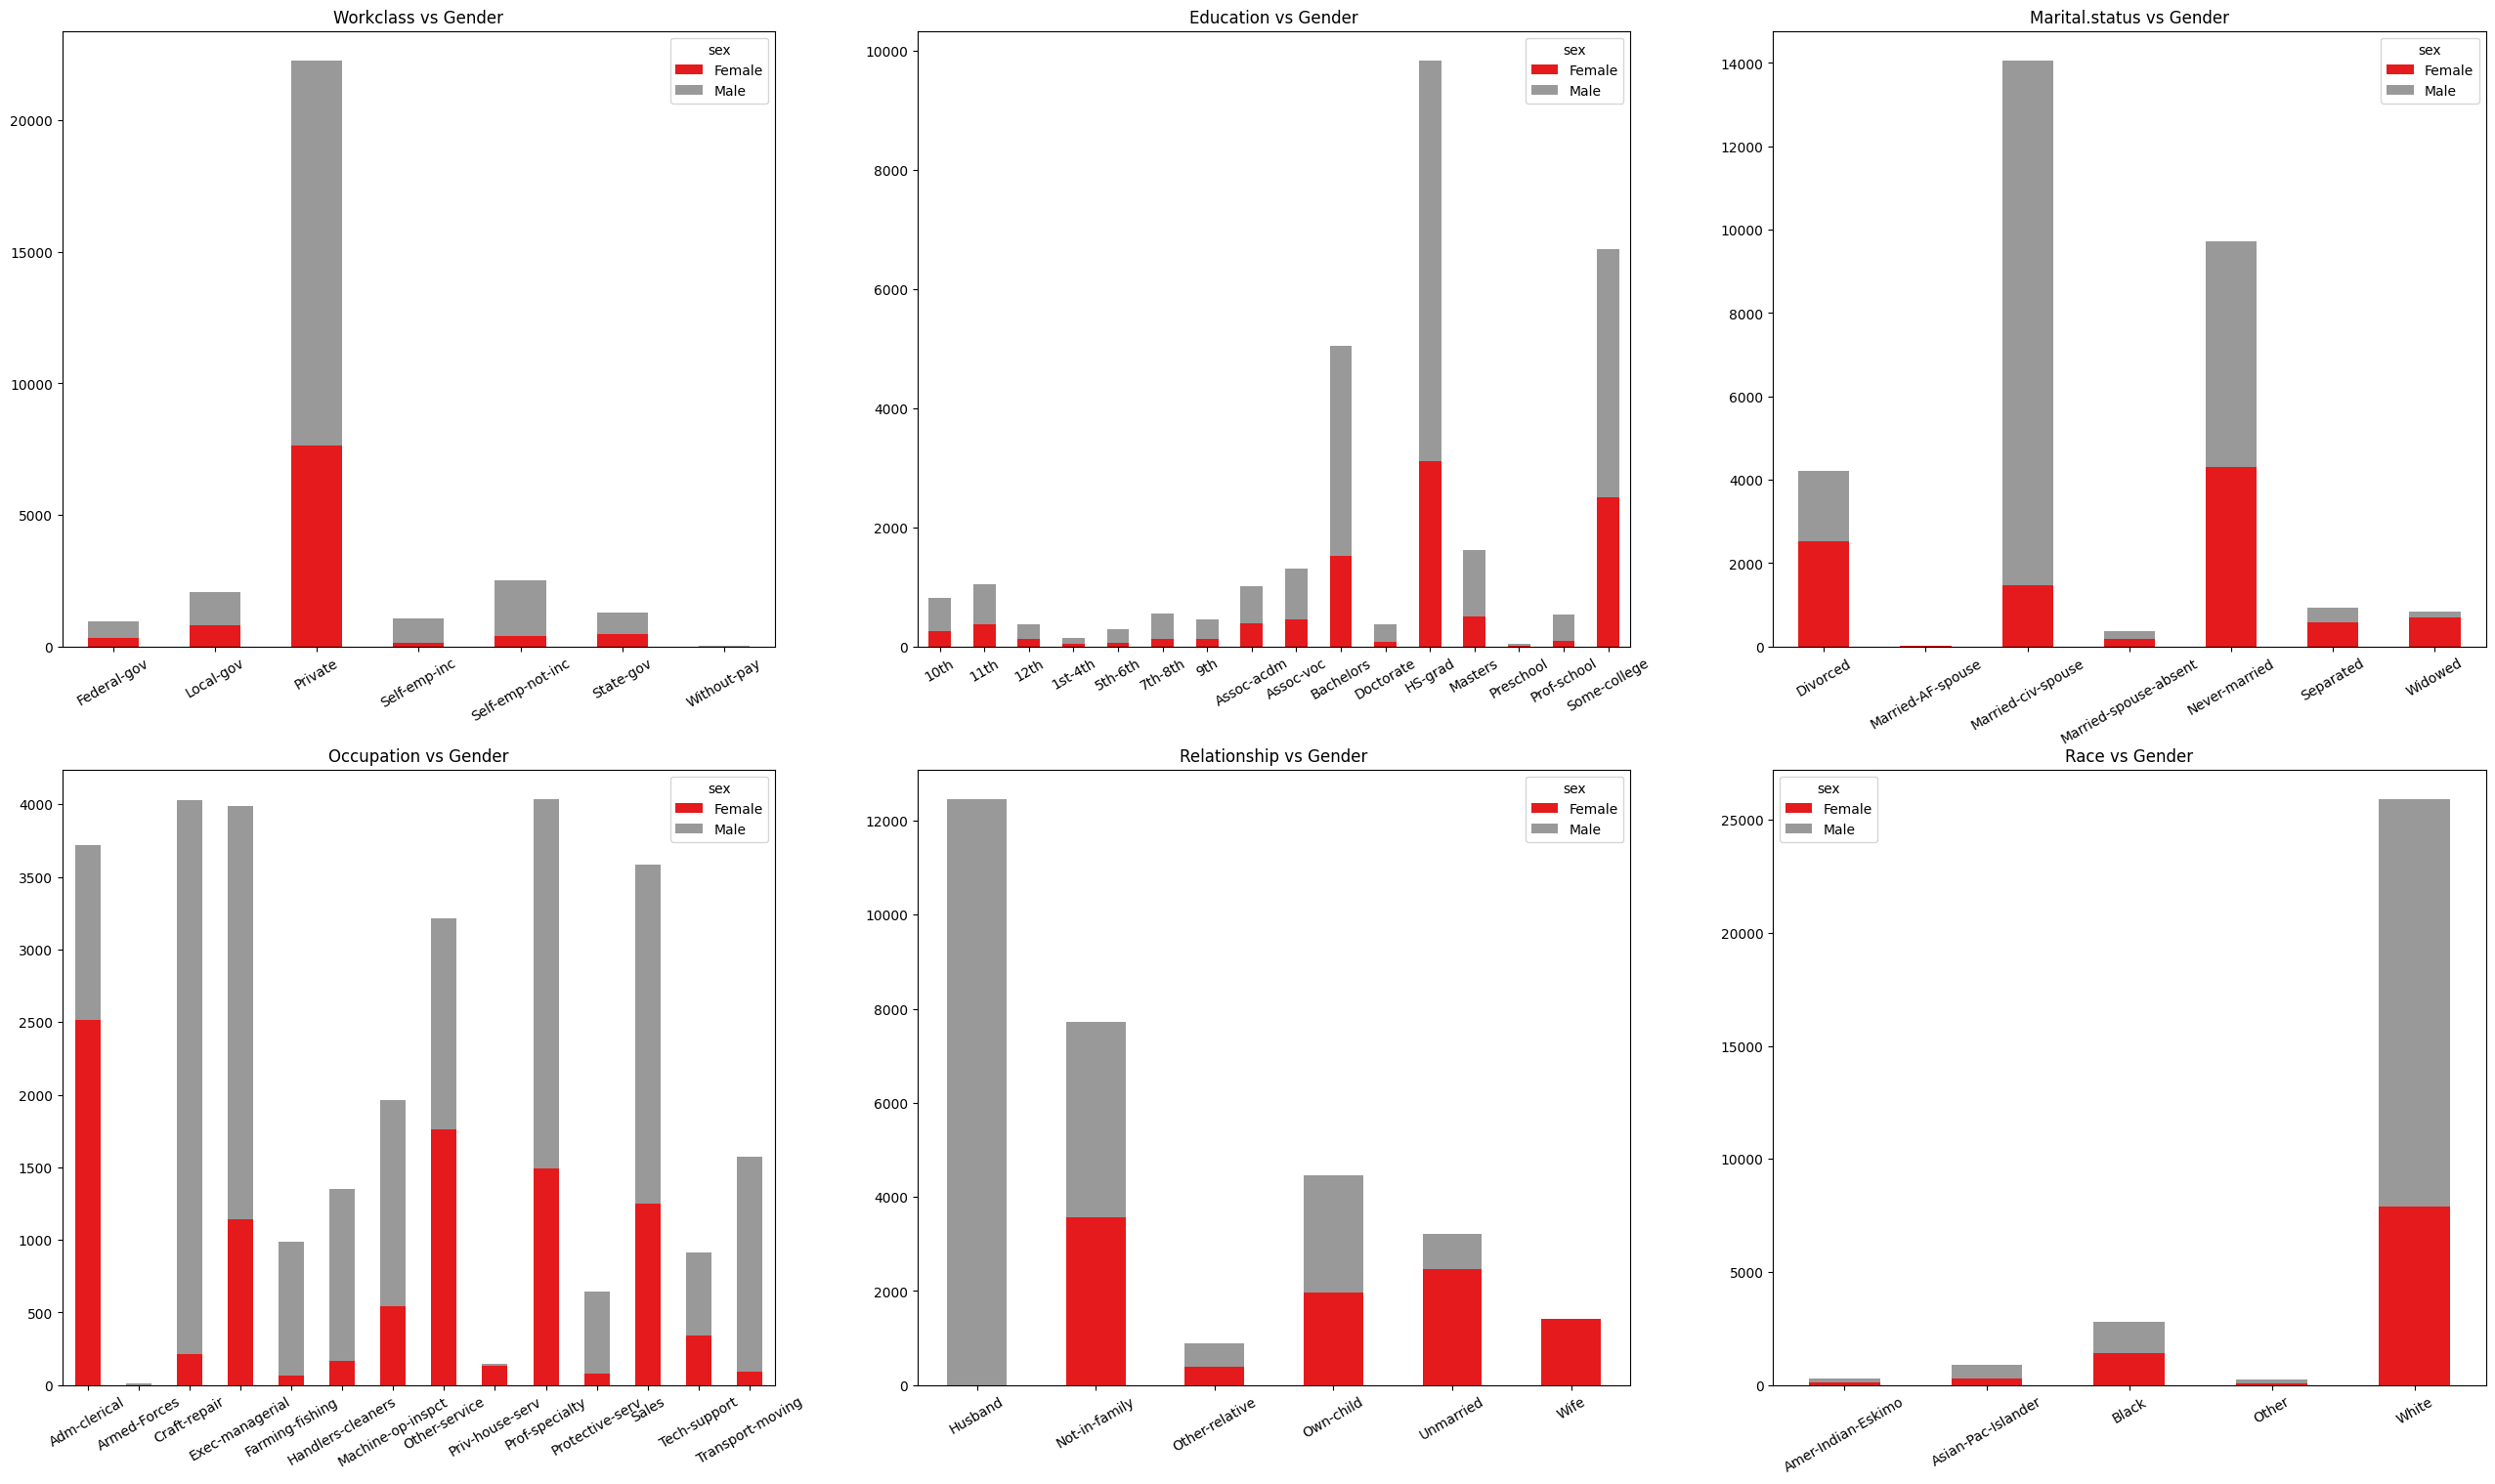

In [38]:
columns = df.drop(columns=numeric_var).columns
fig, axs = plt.subplots(2, 3, figsize=(32, 18))

for ax, col in zip(axs.flatten(), columns):
    crosstab = pd.crosstab(df[col], df['sex'])
    crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='Set1')
    ax.set_title(f'{col.capitalize()} vs Gender')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=30)

## Numerical Values over Age

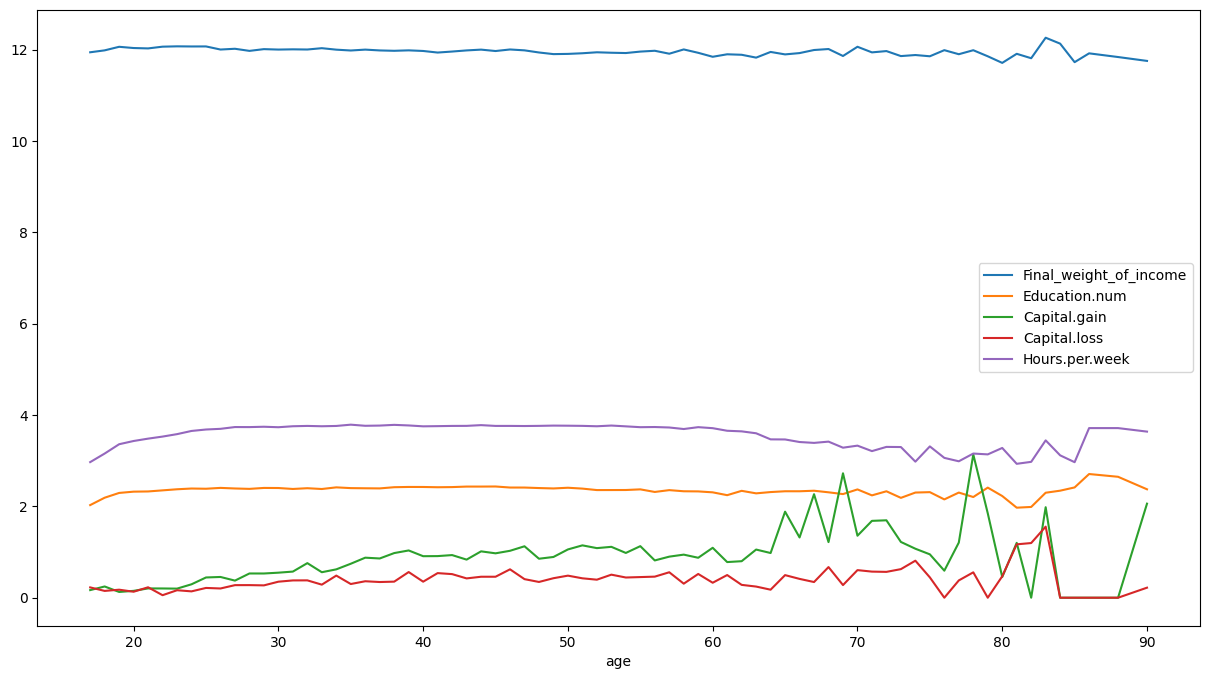

In [39]:
plt.figure(figsize=(15,8))
for col in numeric_var:
    if col != 'age':
        sns.lineplot(x = df['age'], y=np.log(df[col] + 1), label = col.capitalize(), errorbar=None)
        plt.ylabel('')
    else:
        continue

## Boxplot

Text(0.5, 1.0, 'Age vs Race')

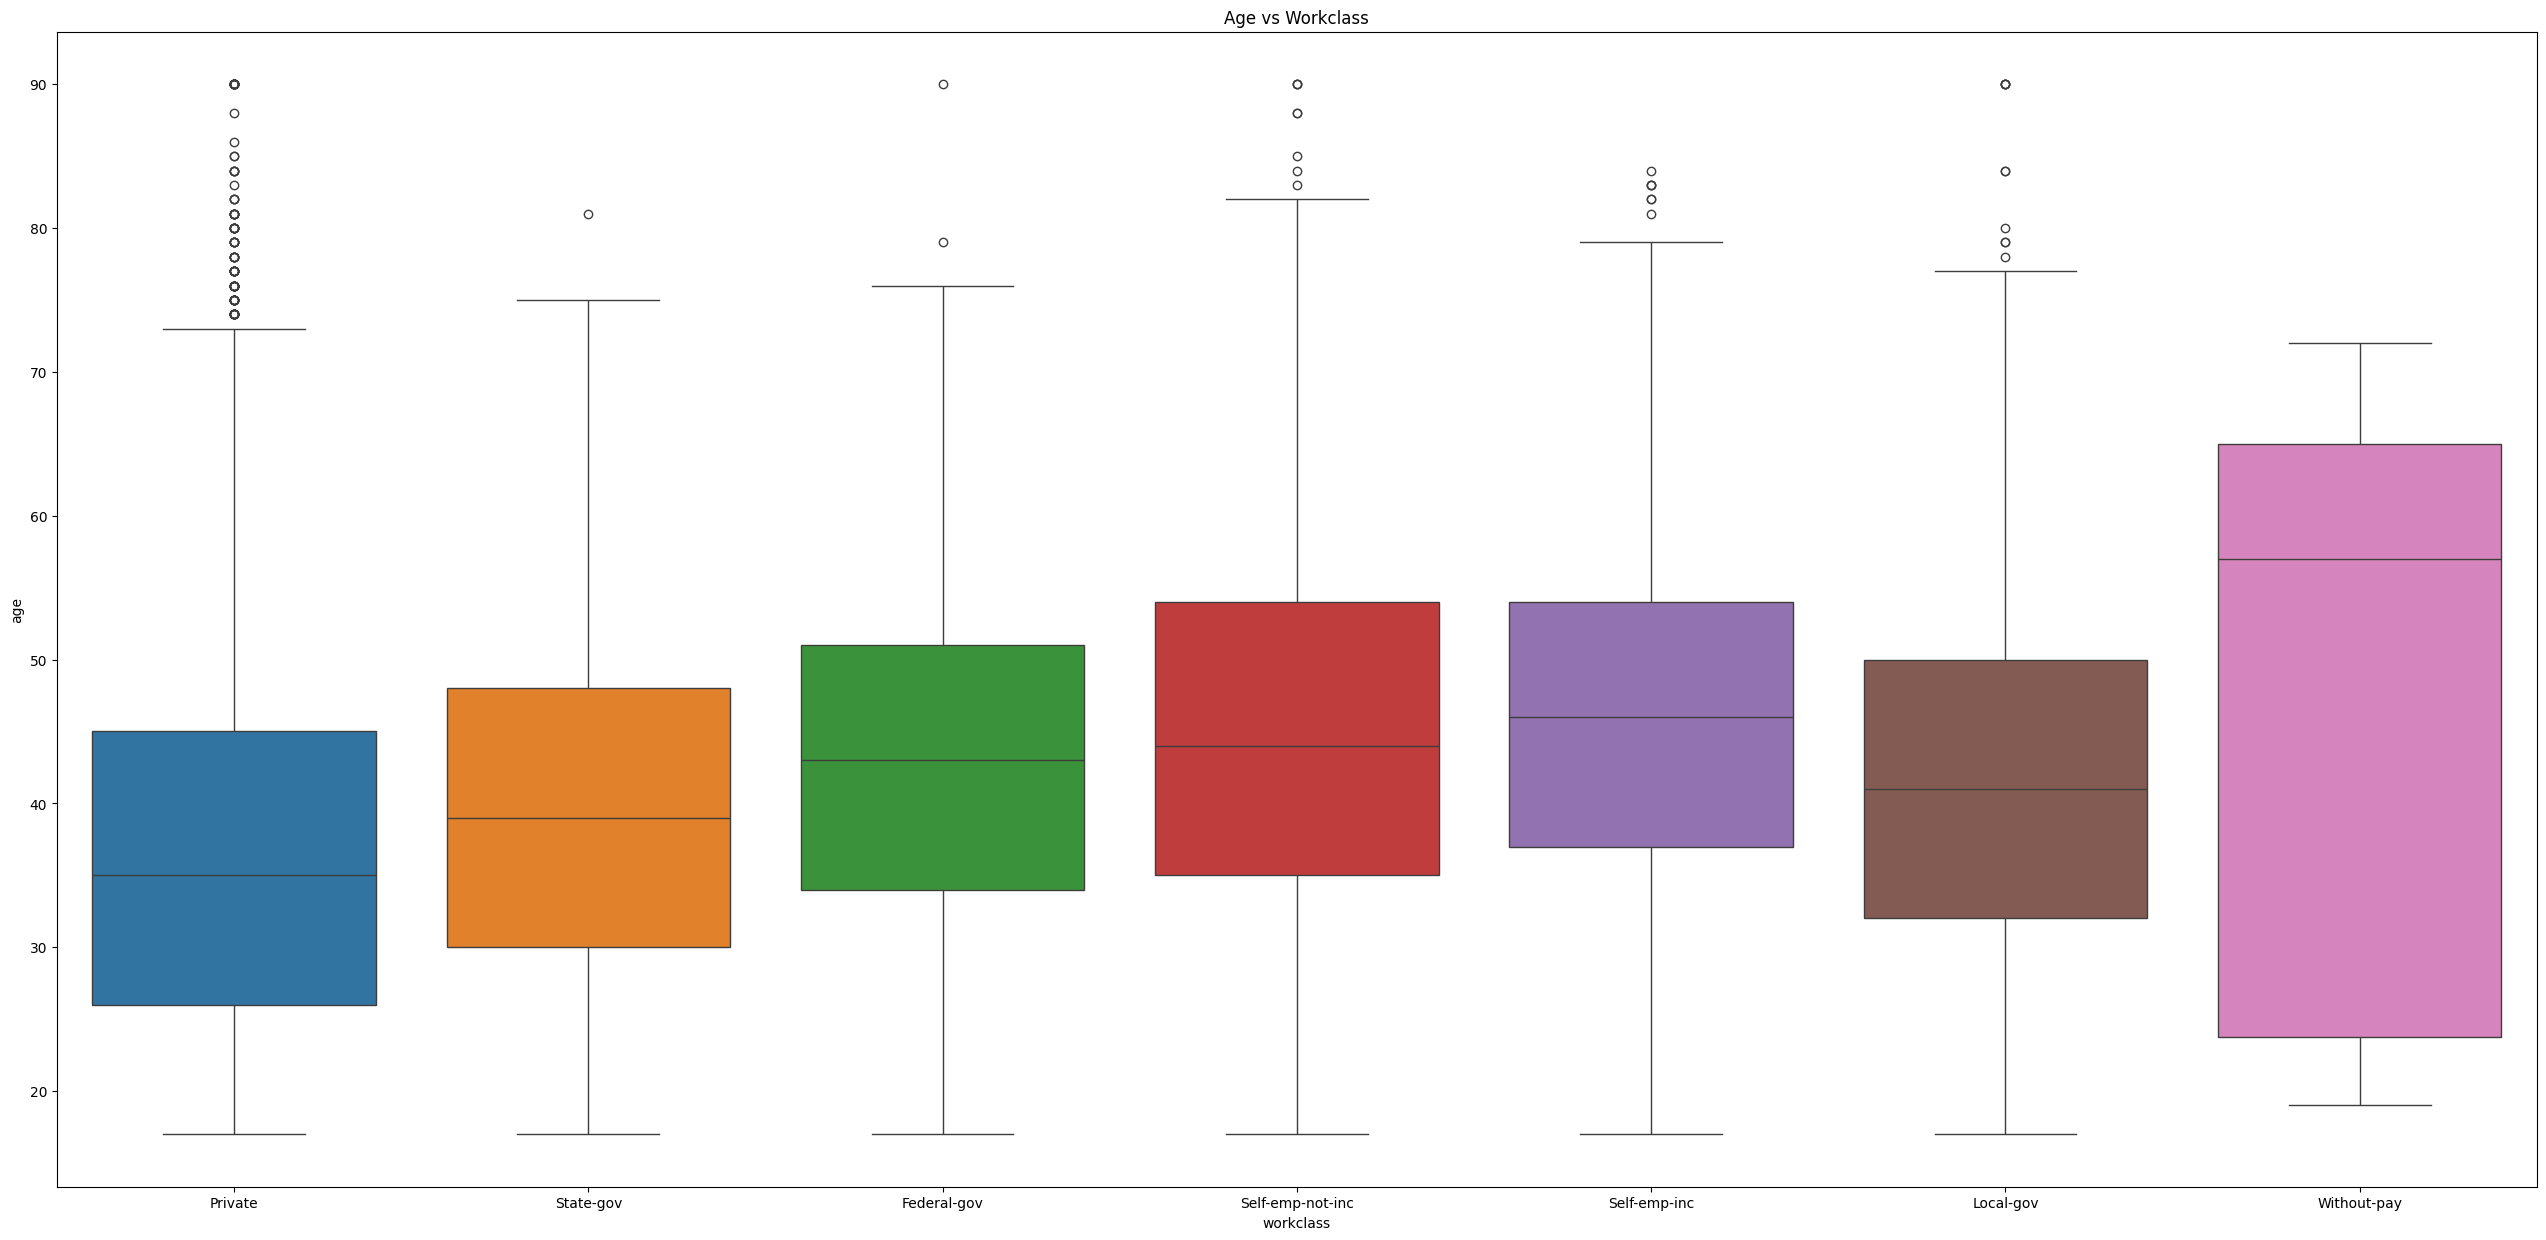

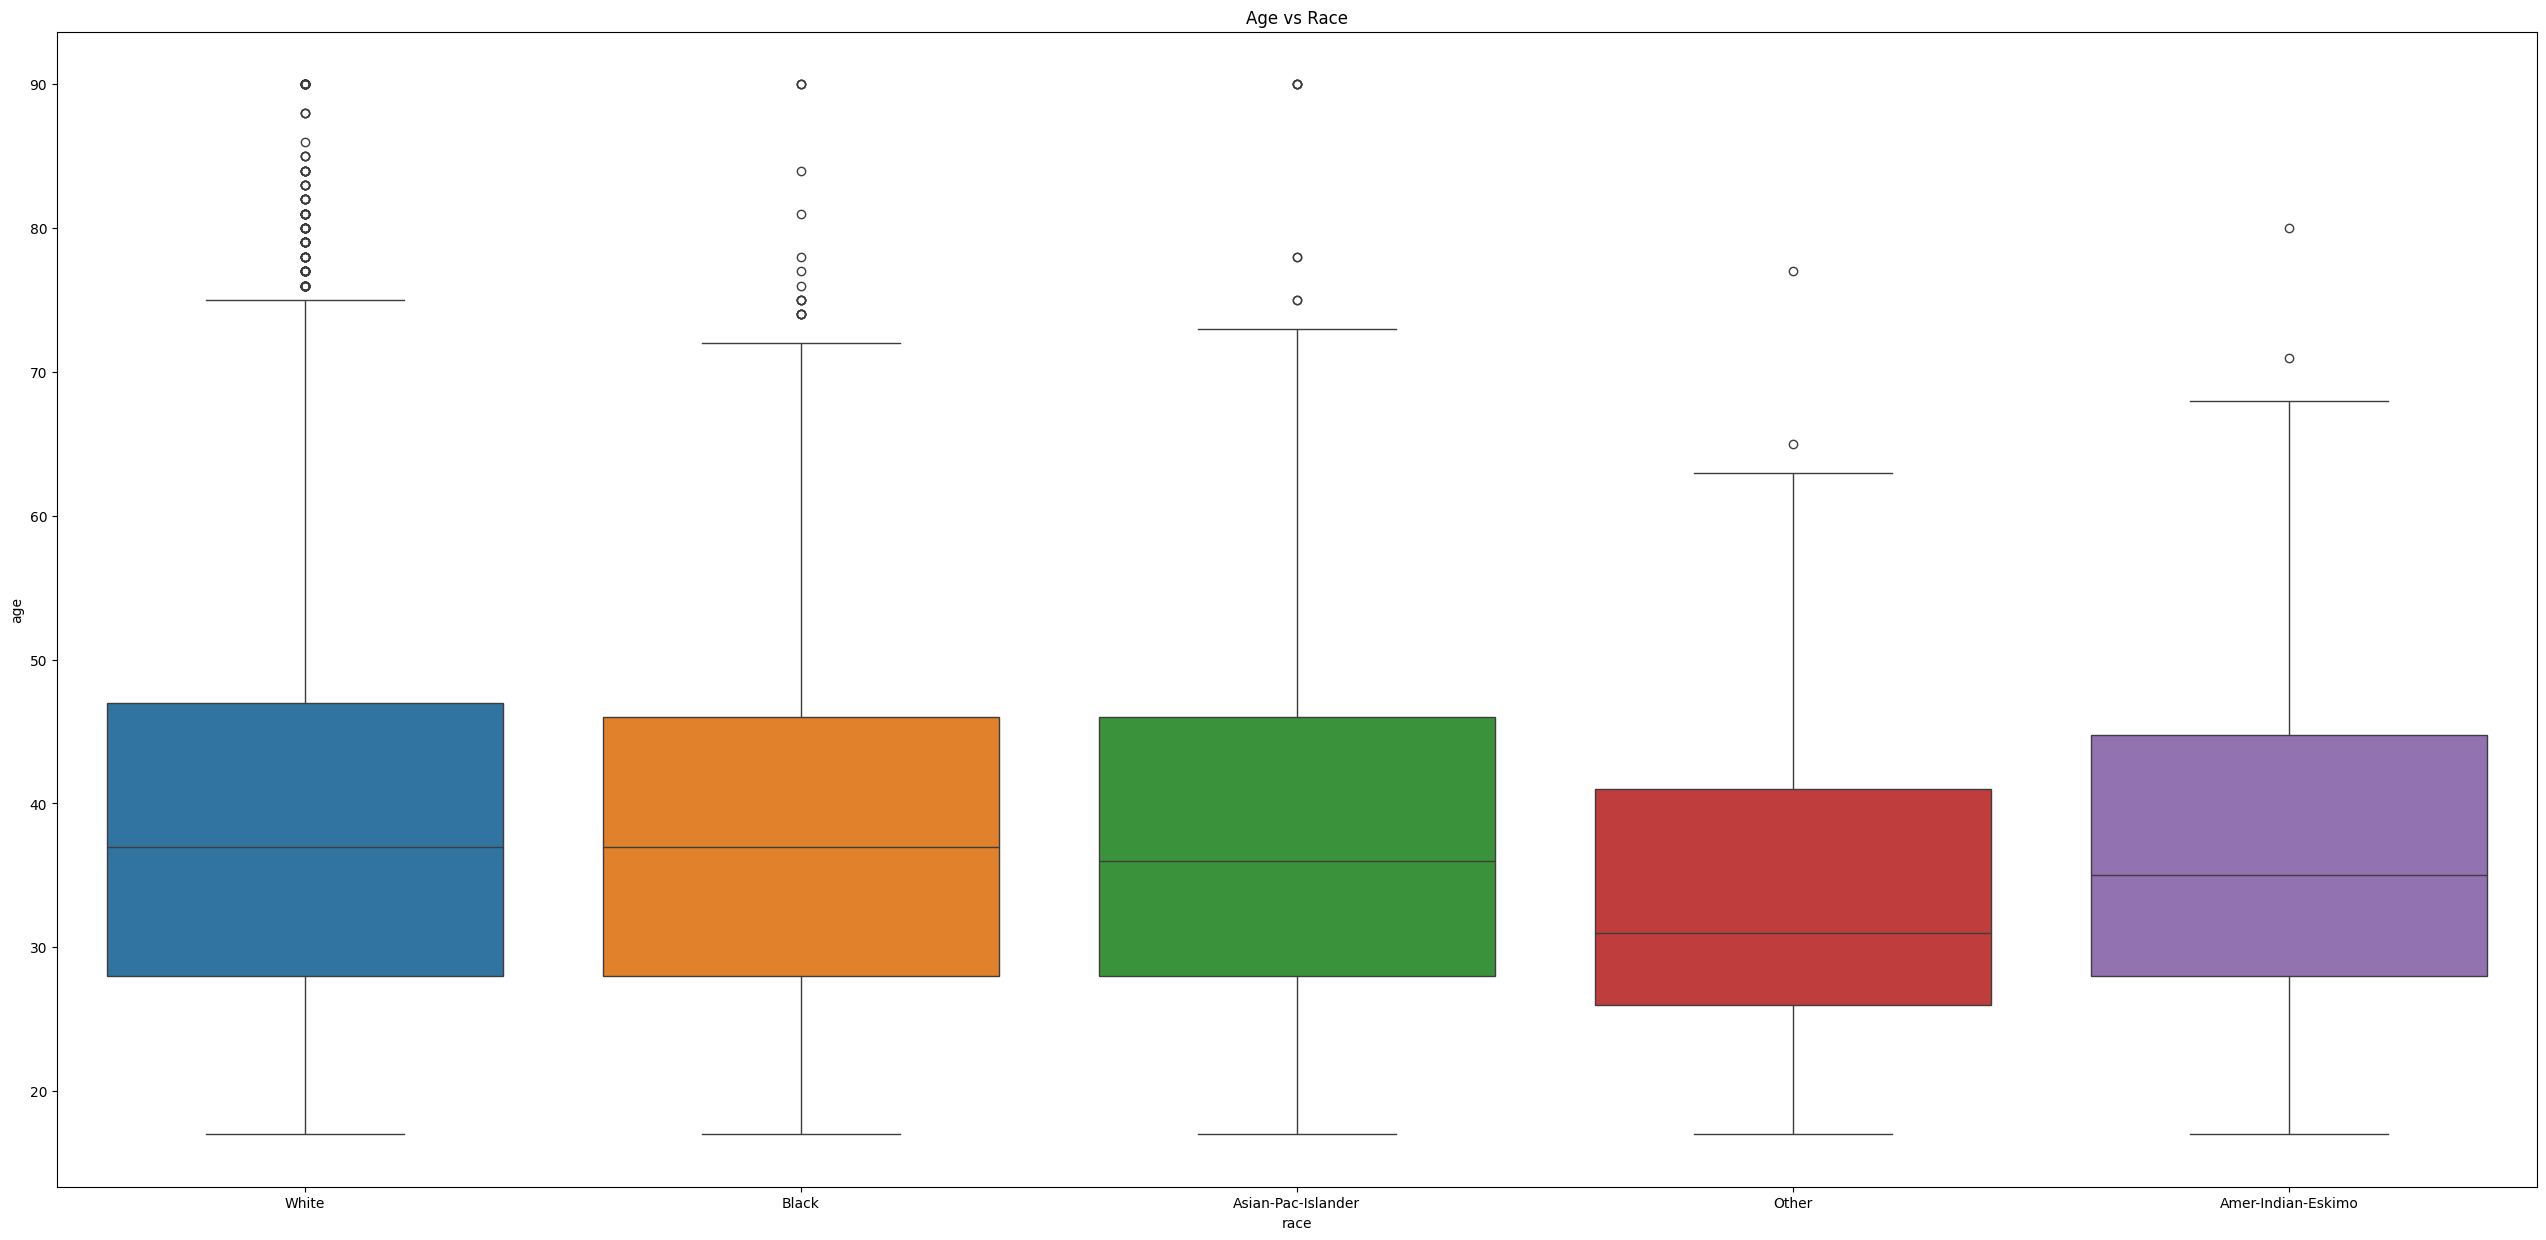

In [40]:
plt.figure(figsize=(32,15))
sns.boxplot(x='workclass', y='age',  hue='workclass', data=df)
plt.title('Age vs Workclass')

plt.figure(figsize=(32,15))
sns.boxplot(x='race', y='age', hue='race', data=df)
plt.title('Age vs Race')

## Correlation Matrix

<Axes: >

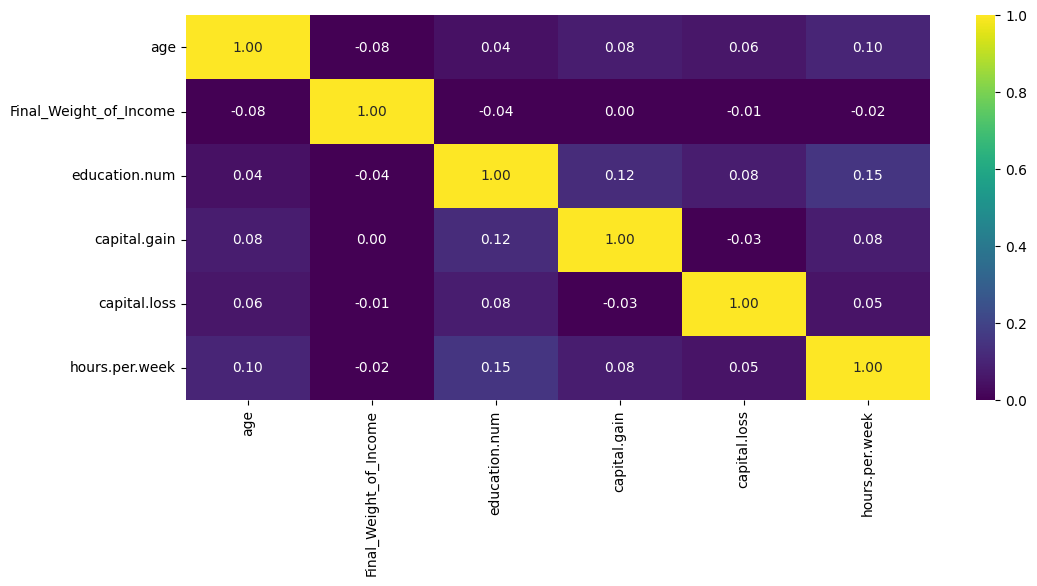

In [41]:
corr = df[numeric_var].corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr, vmin=0, vmax=1, cmap='viridis',
            annot=True, fmt='.2f')

## Data Processing

In [42]:
encoder = LabelEncoder()
column_to_encode = df.drop(columns=numeric_var).columns
for col in column_to_encode:
    df[col] = encoder.fit_transform(df[col])

## Principal Component Analysis (PCA)

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(random_state=42)

pca_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_))])

explained_var = pca.explained_variance_ratio_

print(f'These is the amount of variance explained by each PCA: \n{explained_var}')

print('\nThe Head of the PCA Data')
pca_data.head()

These is the amount of variance explained by each PCA: 
[0.15825881 0.09660014 0.07660075 0.07594461 0.06909804 0.06807487
 0.06632556 0.06400674 0.06100009 0.05660492 0.0555305  0.04729253
 0.04439695 0.03499437 0.02527111]

The Head of the PCA Data


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.258618,0.928383,1.609040,-0.838645,6.723689,5.567246,-0.906728,4.438975,-3.295233,1.727559,-1.908674,-1.568620,3.602691,1.092621,-0.228206
1,0.225251,-0.563032,2.662527,-1.425655,6.033456,5.021103,-1.787438,3.639770,-1.559766,0.152640,1.854227,-3.345848,1.344027,-0.093900,0.220944
2,0.280869,2.061068,-0.759961,-0.068197,6.123122,4.575706,-0.691158,4.032403,-1.852190,0.431344,0.547756,-2.466474,2.766465,0.217899,-0.087425
3,-0.118001,1.383078,1.024628,-0.778052,6.143737,4.062573,-1.140043,3.626645,-1.015489,-0.259912,2.073931,-3.644082,0.796715,0.394276,0.149496
4,0.844288,-1.426130,0.598476,-0.076917,5.795901,4.324565,-1.624967,4.039453,-4.313952,0.555501,1.502288,-1.417445,1.080970,0.522522,1.591612


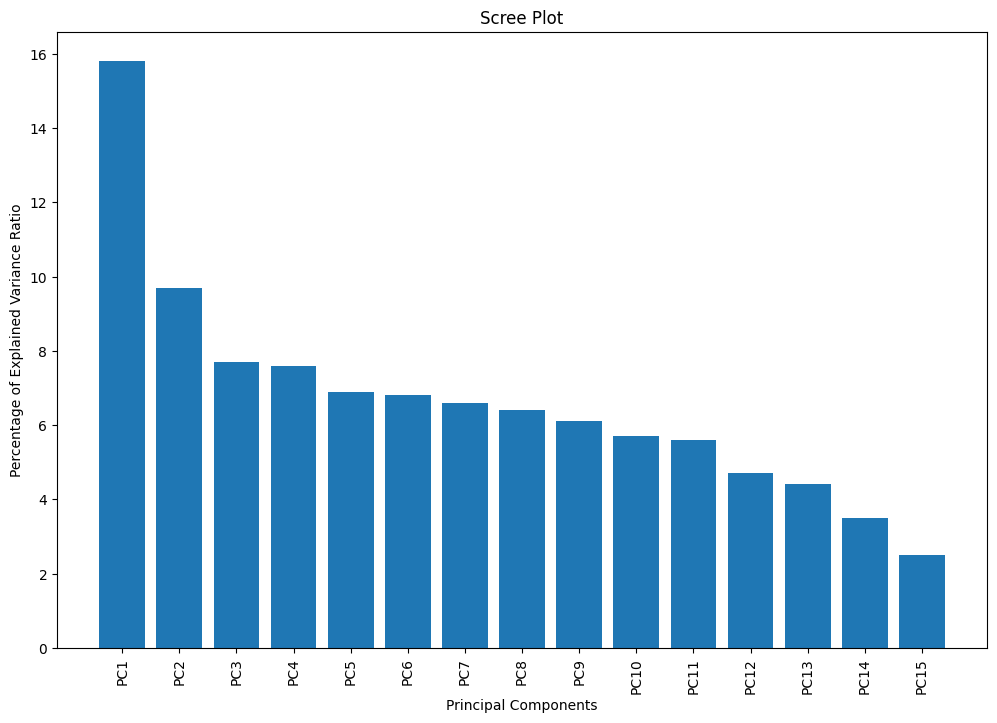

In [44]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(12, 8))
plt.bar(range(1, len(per_var) + 1), height=per_var)

plt.ylabel('Percentage of Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.xticks(ticks=range(1, len(labels) + 1), labels=labels, rotation=90)
plt.show()

# Model Train Evaluation

In [20]:
X_train, X_val, y_train, y_val = train_test_split(pca_data, df['income'], test_size=0.2, random_state=42)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_test_pred = logreg.predict(X_val)
y_train_pred = logreg.predict(X_train)

print(f'Train score is: {metrics.accuracy_score(y_train, y_train_pred)} and the Test score is: {metrics.accuracy_score(y_val, y_test_pred)}')

Train score is: 1.0 and the Test score is: 1.0
